In [34]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os 
import sys
sys.path.append("../")
import matplotlib.pyplot as plt

In [16]:
# Importamos las clases creadas para hace el EDA
from src import soporte_logistica_preprocesamiento as sl
from src import soporte_encoding_logistica as sc
from src import  soporte_logistica_ensamble_CONTENIDO_EXTRA as sal


# Ignorar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_pickle("datos/financial_data.pkl")
df.head()

,customer_id,merchant_id,amount,is_fraudulent,card_type,location,customer_age,transaction_description,purchase_category_Gas Station,purchase_category_Groceries,purchase_category_Online Shopping,purchase_category_Restaurant,purchase_category_Retail,purchase_category_Travel
0,0.60,-0.450980,0.160961,0,0.521611,0.497382,-0.038462,0.517856,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.74,0.058824,-0.601127,1,0.507631,0.529126,0.653846,0.536825,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.96,-0.294118,-0.730090,1,0.521611,0.600000,0.500000,0.506026,1.0,0.0,0.0,0.0,0.0,0.0
3,0.86,-0.254902,0.528558,1,0.504747,0.600000,0.576923,0.525765,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.32,0.647059,-0.603391,1,0.521611,0.497382,-0.307692,0.523806,0.0,0.0,0.0,0.0,1.0,0.0


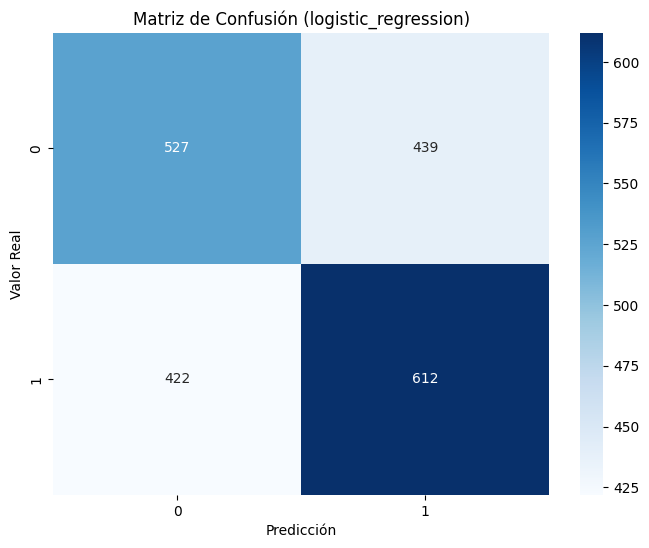

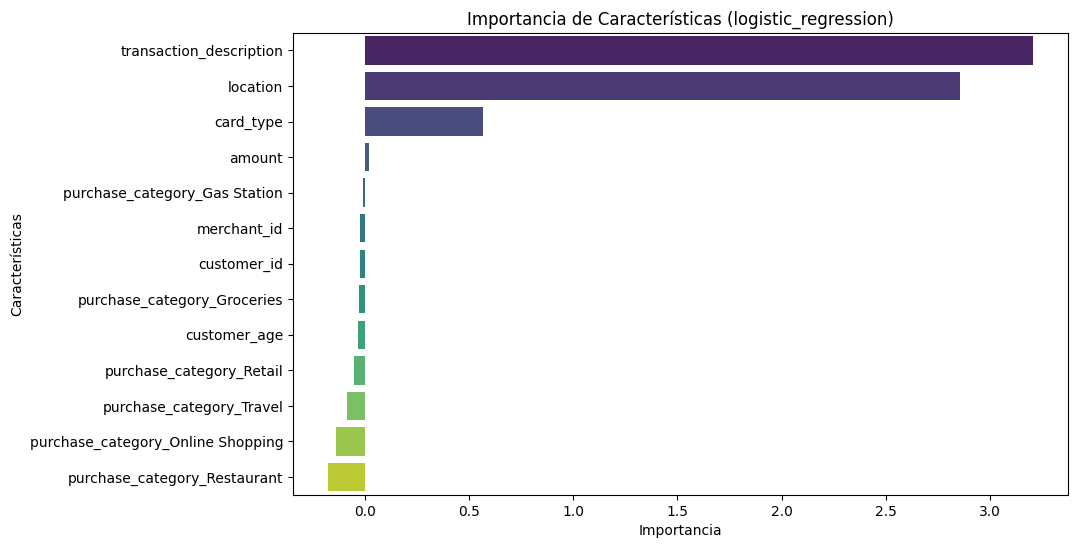

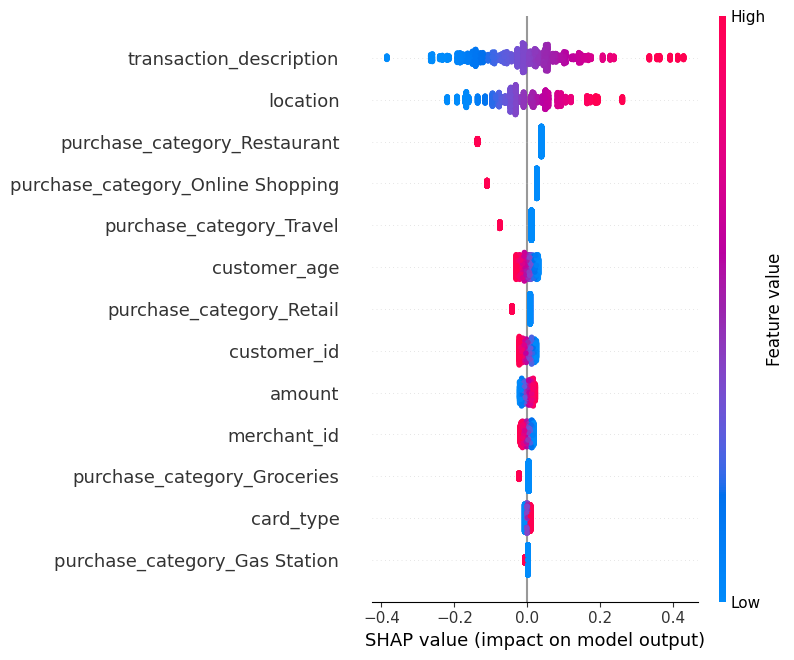

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.54975,0.549677,0.54975,0.549559,0.099178,0.568046,0.006018,8.0,NaN,NaN,regresion logistica
test,0.56950,0.569271,0.56950,0.569344,0.137504,0.587339,NaN,NaN,0.006018,8.0,regresion logistica


In [7]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

logistica.plot_matriz_confusion("logistic_regression")
logistica.importancia_predictores(modelo_nombre ='logistic_regression')
logistica.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

**Pero... ¿por qué no nos devuelve la misma información en la importancia de las variables?**

| **Criterio**               | **SHAP**                                                                                         | **Feature Importance**                                                                                      |
|----------------------------|--------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| **Interacciones**          | Captura interacciones entre variables, detectando dependencias no lineales.                     | No captura interacciones entre variables; evalúa cada característica individualmente.                      |
| **Métrica base**           | Impacto en las predicciones, basado en la **teoría de juegos** y contribución aditiva.          | Reducción de la **impureza** (como Gini o MSE) en los nodos del árbol donde se usa una característica.      |
| **Salidas de las métricas**| Genera valores para cada muestra del conjunto de datos, con una explicación detallada.          | Genera un valor único por característica, sin considerar predicciones individuales.                         |
| **Uso práctico**           | Ideal para explicar modelos a nivel de predicciones individuales y detectar interacciones.      | Útil para identificar rápidamente las características clave globales del modelo.                           |
| **Visualización**          | Genera gráficos ricos como el **summary plot**. | Genera un gráfico de barras simple con la importancia general de cada característica.                      |
| **Ejemplo práctico**       | En un modelo de riesgo crediticio, SHAP detectará que la combinación de "Edad" e "Ingresos" afecta una predicción. | En el mismo caso, Feature Importance destacará "Ingresos" si es la característica que más reduce la impureza en promedio. |

El mejor modelo es DecisionTreeClassifier(max_depth=3)


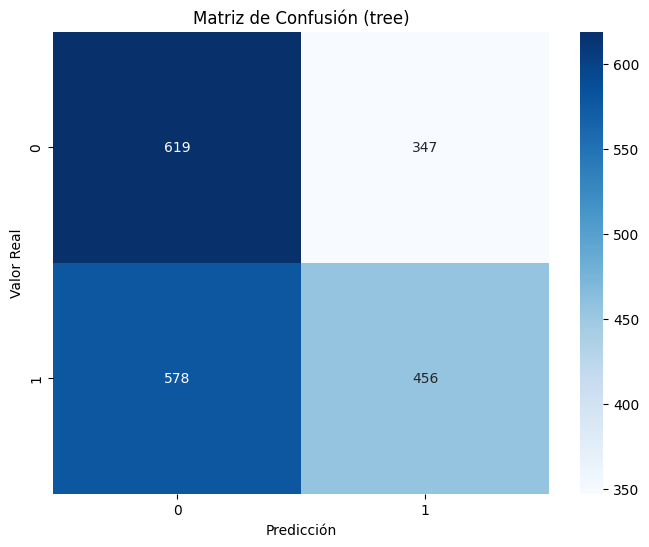

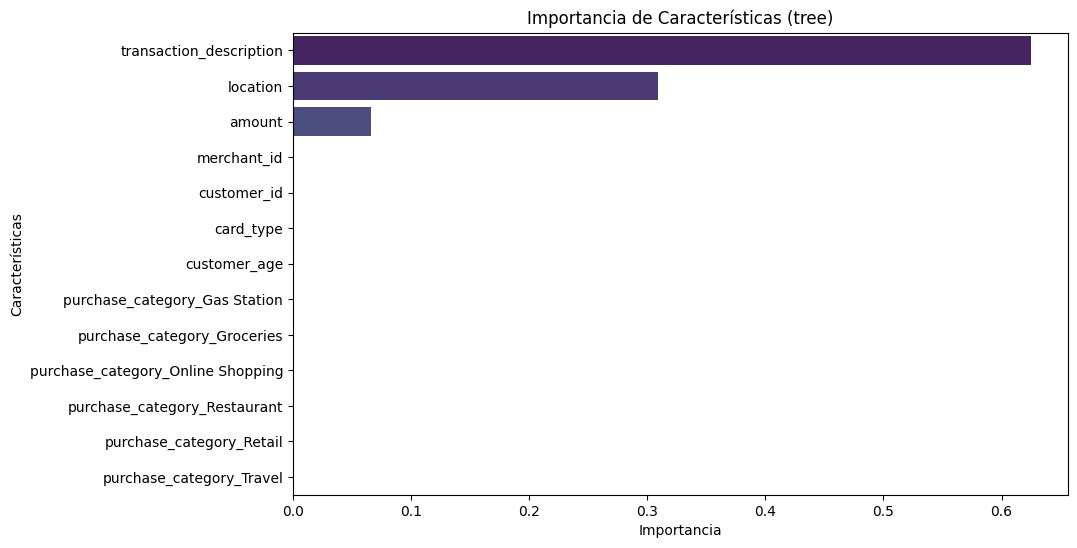

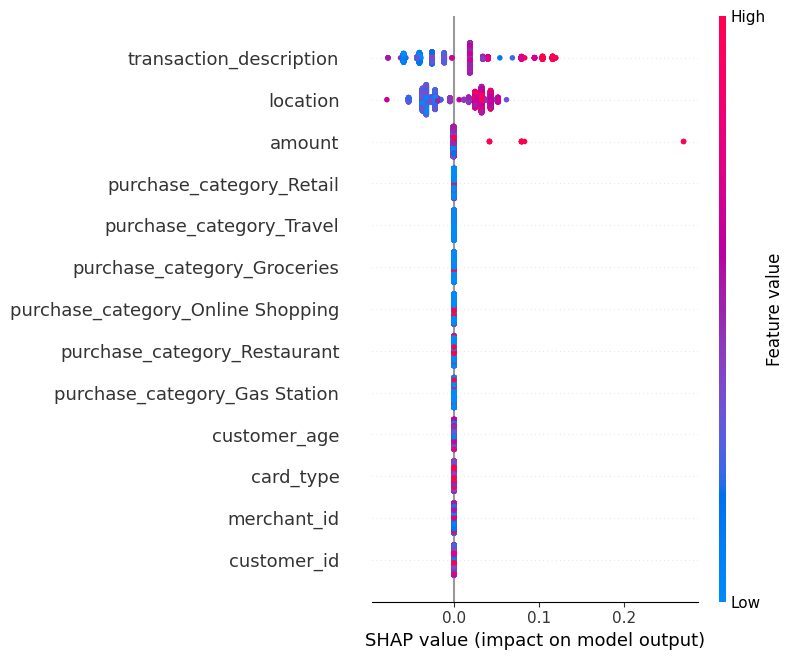

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.548625,0.551707,0.548625,0.543997,0.098795,0.563639,0.003024,8.0,NaN,NaN,decision tree
test,0.537500,0.543361,0.537500,0.533117,0.081154,0.559608,NaN,NaN,0.003024,8.0,decision tree
train,0.549750,0.549677,0.549750,0.549559,0.099178,0.568046,0.006018,8.0,NaN,NaN,regresion logistica
test,0.569500,0.569271,0.569500,0.569344,0.137504,0.587339,NaN,NaN,0.006018,8.0,regresion logistica


In [8]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("tree")

logistica.plot_matriz_confusion("tree")
logistica.importancia_predictores(modelo_nombre ='tree')
logistica.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree = logistica.calcular_metricas(modelo_nombre =  "tree" )
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

El mejor modelo es RandomForestClassifier(max_depth=8)


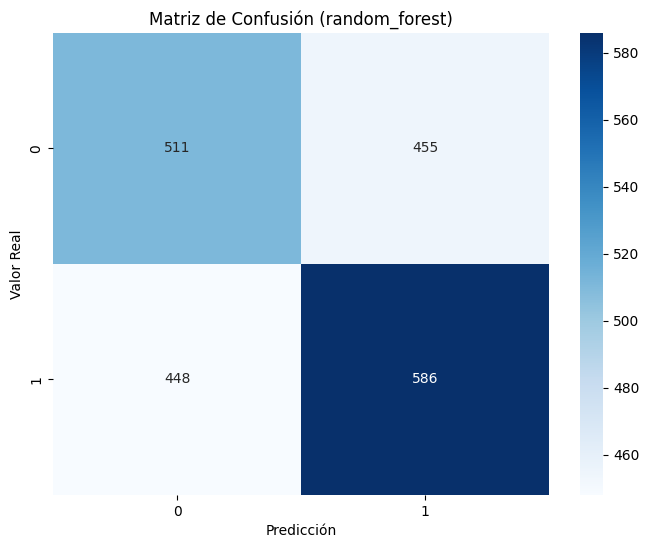

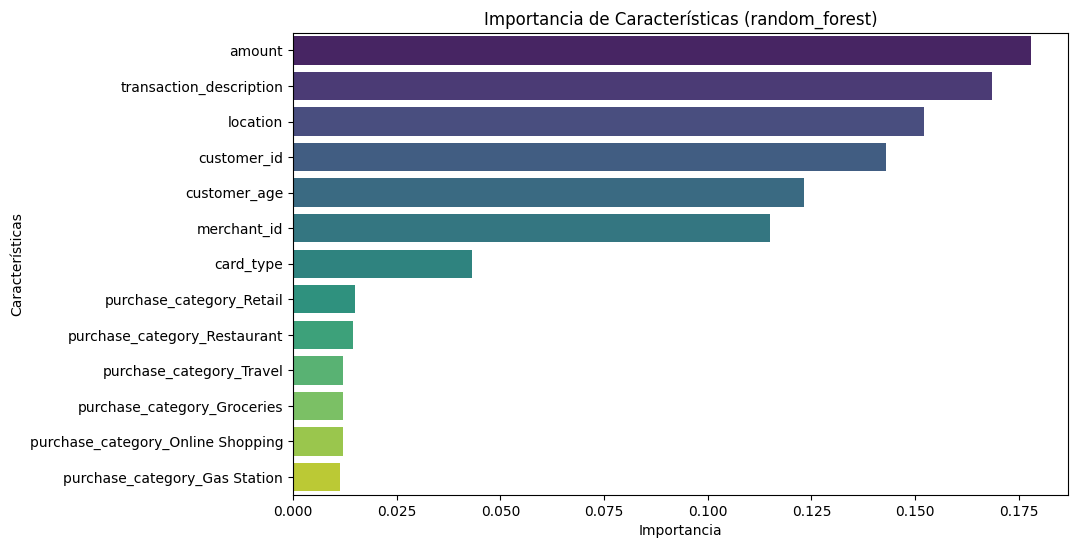

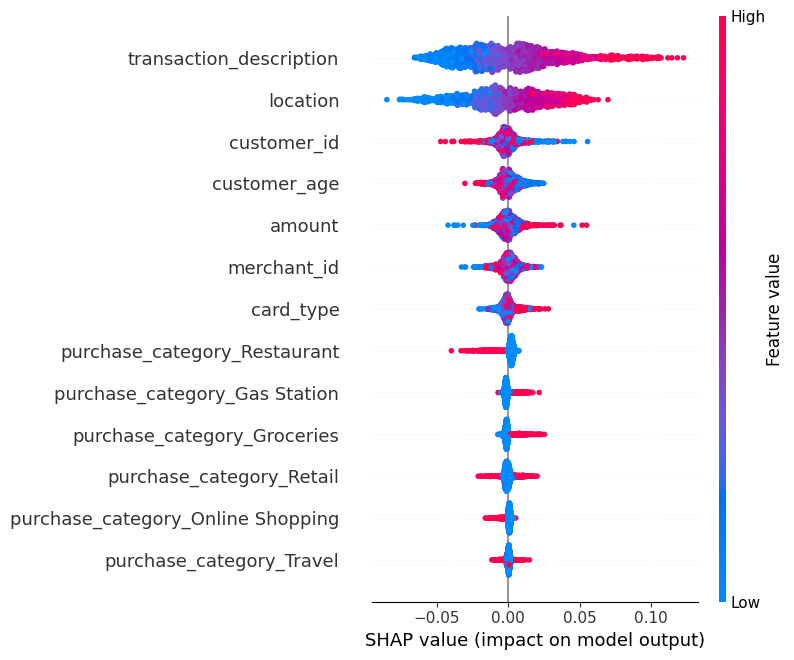

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.548625,0.551707,0.548625,0.543997,0.098795,0.563639,0.003024,8.0,NaN,NaN,decision tree
test,0.537500,0.543361,0.537500,0.533117,0.081154,0.559608,NaN,NaN,0.003024,8.0,decision tree
train,0.549750,0.549677,0.549750,0.549559,0.099178,0.568046,0.006018,8.0,NaN,NaN,regresion logistica
test,0.569500,0.569271,0.569500,0.569344,0.137504,0.587339,NaN,NaN,0.006018,8.0,regresion logistica
train,0.725125,0.725303,0.725125,0.725007,0.450053,0.819329,0.088794,NaN,NaN,NaN,random_forest
test,0.548500,0.548395,0.548500,0.548441,0.095739,0.569111,NaN,NaN,0.088794,NaN,random_forest


In [9]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

logistica.plot_matriz_confusion("random_forest")
logistica.importancia_predictores(modelo_nombre ='random_forest')
logistica.plot_shap_summary(modelo_nombre ='random_forest')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_forest = logistica.calcular_metricas(modelo_nombre =  "random_forest" )
df_resultados_forest["modelo"] = "random_forest"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_forest], axis = 0)
df_resultados_final


El mejor modelo es GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=4,
                           min_samples_split=5, subsample=0.8)


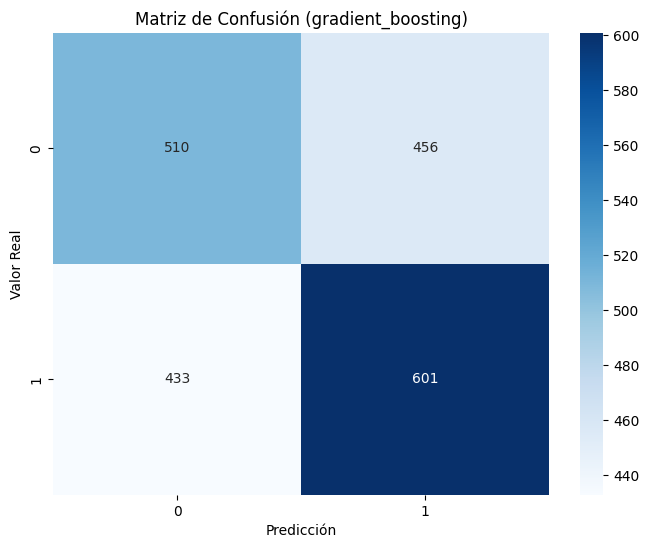

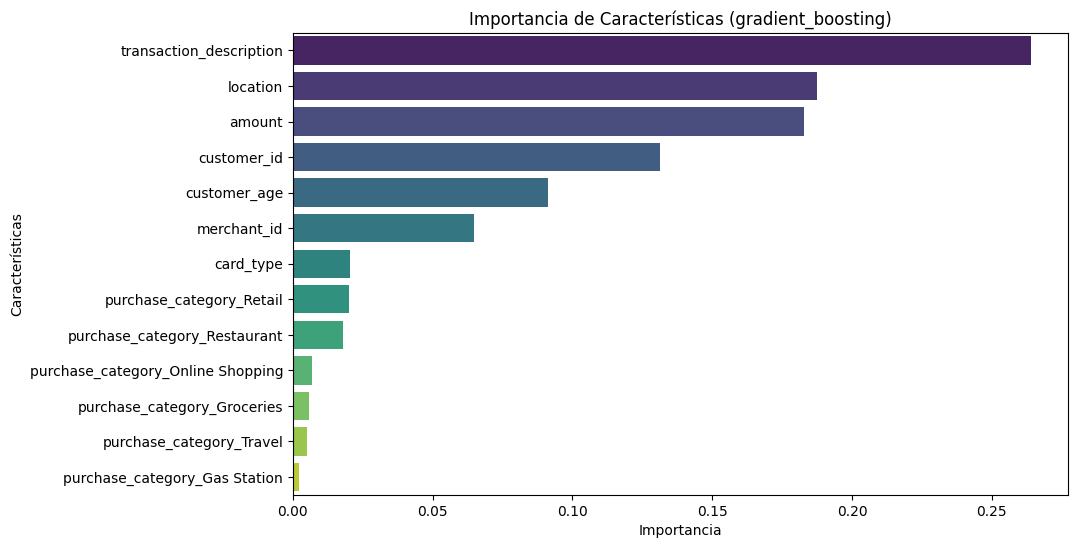

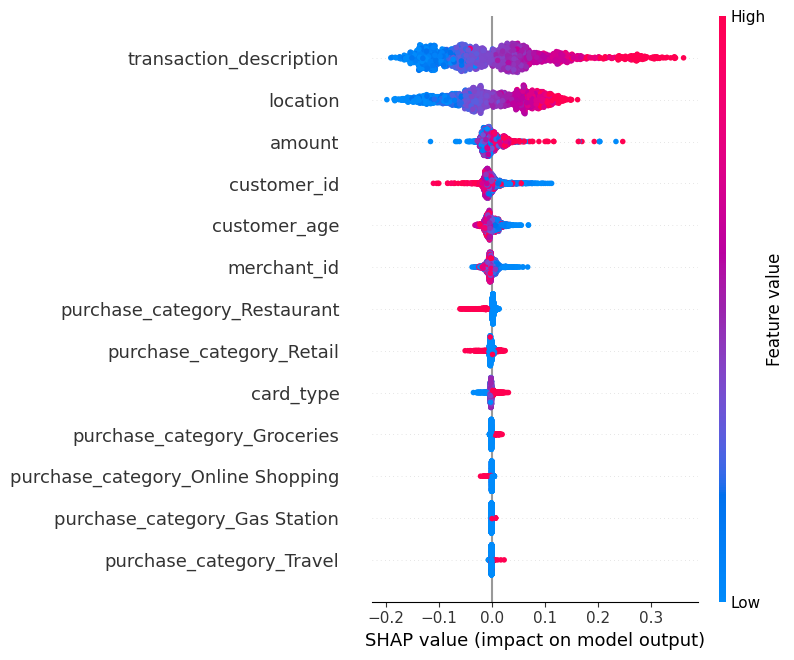

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.548625,0.551707,0.548625,0.543997,0.098795,0.563639,0.003024,8.0,NaN,NaN,decision tree
test,0.537500,0.543361,0.537500,0.533117,0.081154,0.559608,NaN,NaN,0.003024,8.0,decision tree
train,0.549750,0.549677,0.549750,0.549559,0.099178,0.568046,0.006018,8.0,NaN,NaN,regresion logistica
test,0.569500,0.569271,0.569500,0.569344,0.137504,0.587339,NaN,NaN,0.006018,8.0,regresion logistica
train,0.725125,0.725303,0.725125,0.725007,0.450053,0.819329,0.088794,NaN,NaN,NaN,random_forest
test,0.548500,0.548395,0.548500,0.548441,0.095739,0.569111,NaN,NaN,0.088794,NaN,random_forest
train,0.589375,0.589389,0.589375,0.589113,0.178392,0.627545,0.031948,8.0,NaN,NaN,gradient_boosting
test,0.555500,0.555181,0.555500,0.555267,0.109274,0.566536,NaN,NaN,0.031948,8.0,gradient_boosting


In [10]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("gradient_boosting")

logistica.plot_matriz_confusion("gradient_boosting")
logistica.importancia_predictores(modelo_nombre ='gradient_boosting')
logistica.plot_shap_summary(modelo_nombre="gradient_boosting")


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient = logistica.calcular_metricas(modelo_nombre =  "gradient_boosting" )
df_resultados_gradient["modelo"] = "gradient_boosting"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_gradient], axis = 0)
df_resultados_final


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


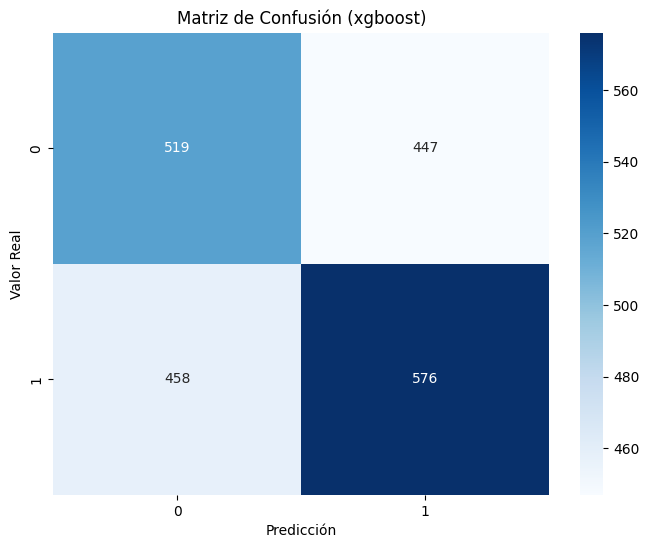

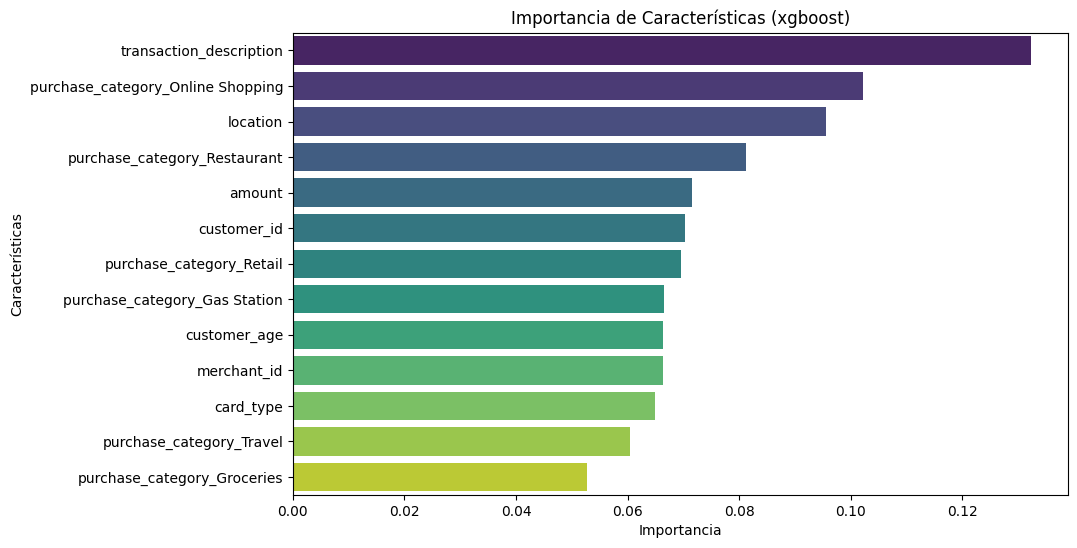

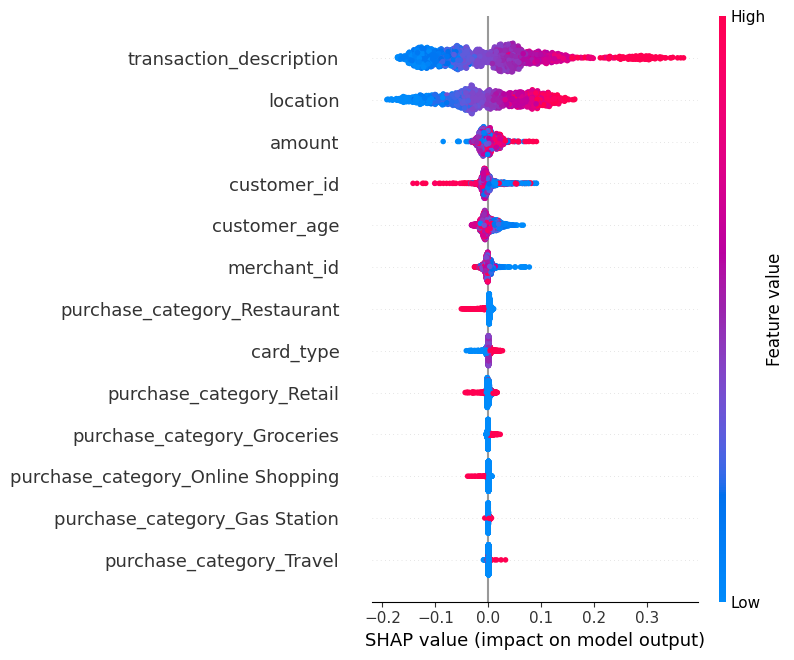

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.548625,0.551707,0.548625,0.543997,0.098795,0.563639,0.003024,8.0,NaN,NaN,decision tree
test,0.537500,0.543361,0.537500,0.533117,0.081154,0.559608,NaN,NaN,0.003024,8.0,decision tree
train,0.549750,0.549677,0.549750,0.549559,0.099178,0.568046,0.006018,8.0,NaN,NaN,regresion logistica
test,0.569500,0.569271,0.569500,0.569344,0.137504,0.587339,NaN,NaN,0.006018,8.0,regresion logistica
train,0.725125,0.725303,0.725125,0.725007,0.450053,0.819329,0.088794,NaN,NaN,NaN,random_forest
test,0.548500,0.548395,0.548500,0.548441,0.095739,0.569111,NaN,NaN,0.088794,NaN,random_forest
train,0.589375,0.589389,0.589375,0.589113,0.178392,0.627545,0.031948,8.0,NaN,NaN,gradient_boosting
test,0.555500,0.555181,0.555500,0.555267,0.109274,0.566536,NaN,NaN,0.031948,8.0,gradient_boosting
train,0.587250,0.587218,0.587250,0.587205,0.174342,0.624509,0.017918,NaN,NaN,NaN,xgboost
test,0.547500,0.547675,0.547500,0.547571,0.094292,0.569560,NaN,NaN,0.017918,NaN,xgboost


In [11]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("xgboost")

logistica.plot_matriz_confusion("xgboost")
logistica.importancia_predictores(modelo_nombre ='xgboost')
logistica.plot_shap_summary(modelo_nombre="xgboost")


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = logistica.calcular_metricas(modelo_nombre =  "xgboost" )
df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_xgboost], axis = 0)
df_resultados_final

In [33]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.reset_index(inplace = True)
df_resultados_colores = df_resultados_colores.style.apply(sal.color_filas_por_modelo, axis=1)
df_resultados_colores



,index,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,train,0.548625,0.551707,0.548625,0.543997,0.098795,0.563639,0.003024,8.000000,nan,nan,decision tree
1,test,0.537500,0.543361,0.537500,0.533117,0.081154,0.559608,nan,nan,0.003024,8.000000,decision tree
2,train,0.549750,0.549677,0.549750,0.549559,0.099178,0.568046,0.006018,8.000000,nan,nan,regresion logistica
3,test,0.569500,0.569271,0.569500,0.569344,0.137504,0.587339,nan,nan,0.006018,8.000000,regresion logistica
4,train,0.725125,0.725303,0.725125,0.725007,0.450053,0.819329,0.088794,nan,nan,nan,random_forest
5,test,0.548500,0.548395,0.548500,0.548441,0.095739,0.569111,nan,nan,0.088794,nan,random_forest
6,train,0.589375,0.589389,0.589375,0.589113,0.178392,0.627545,0.031948,8.000000,nan,nan,gradient_boosting
7,test,0.555500,0.555181,0.555500,0.555267,0.109274,0.566536,nan,nan,0.031948,8.000000,gradient_boosting
8,train,0.587250,0.587218,0.587250,0.587205,0.174342,0.624509,0.017918,nan,nan,nan,xgboost
9,test,0.547500,0.547675,0.547500,0.547571,0.094292,0.569560,nan,nan,0.017918,nan,xgboost


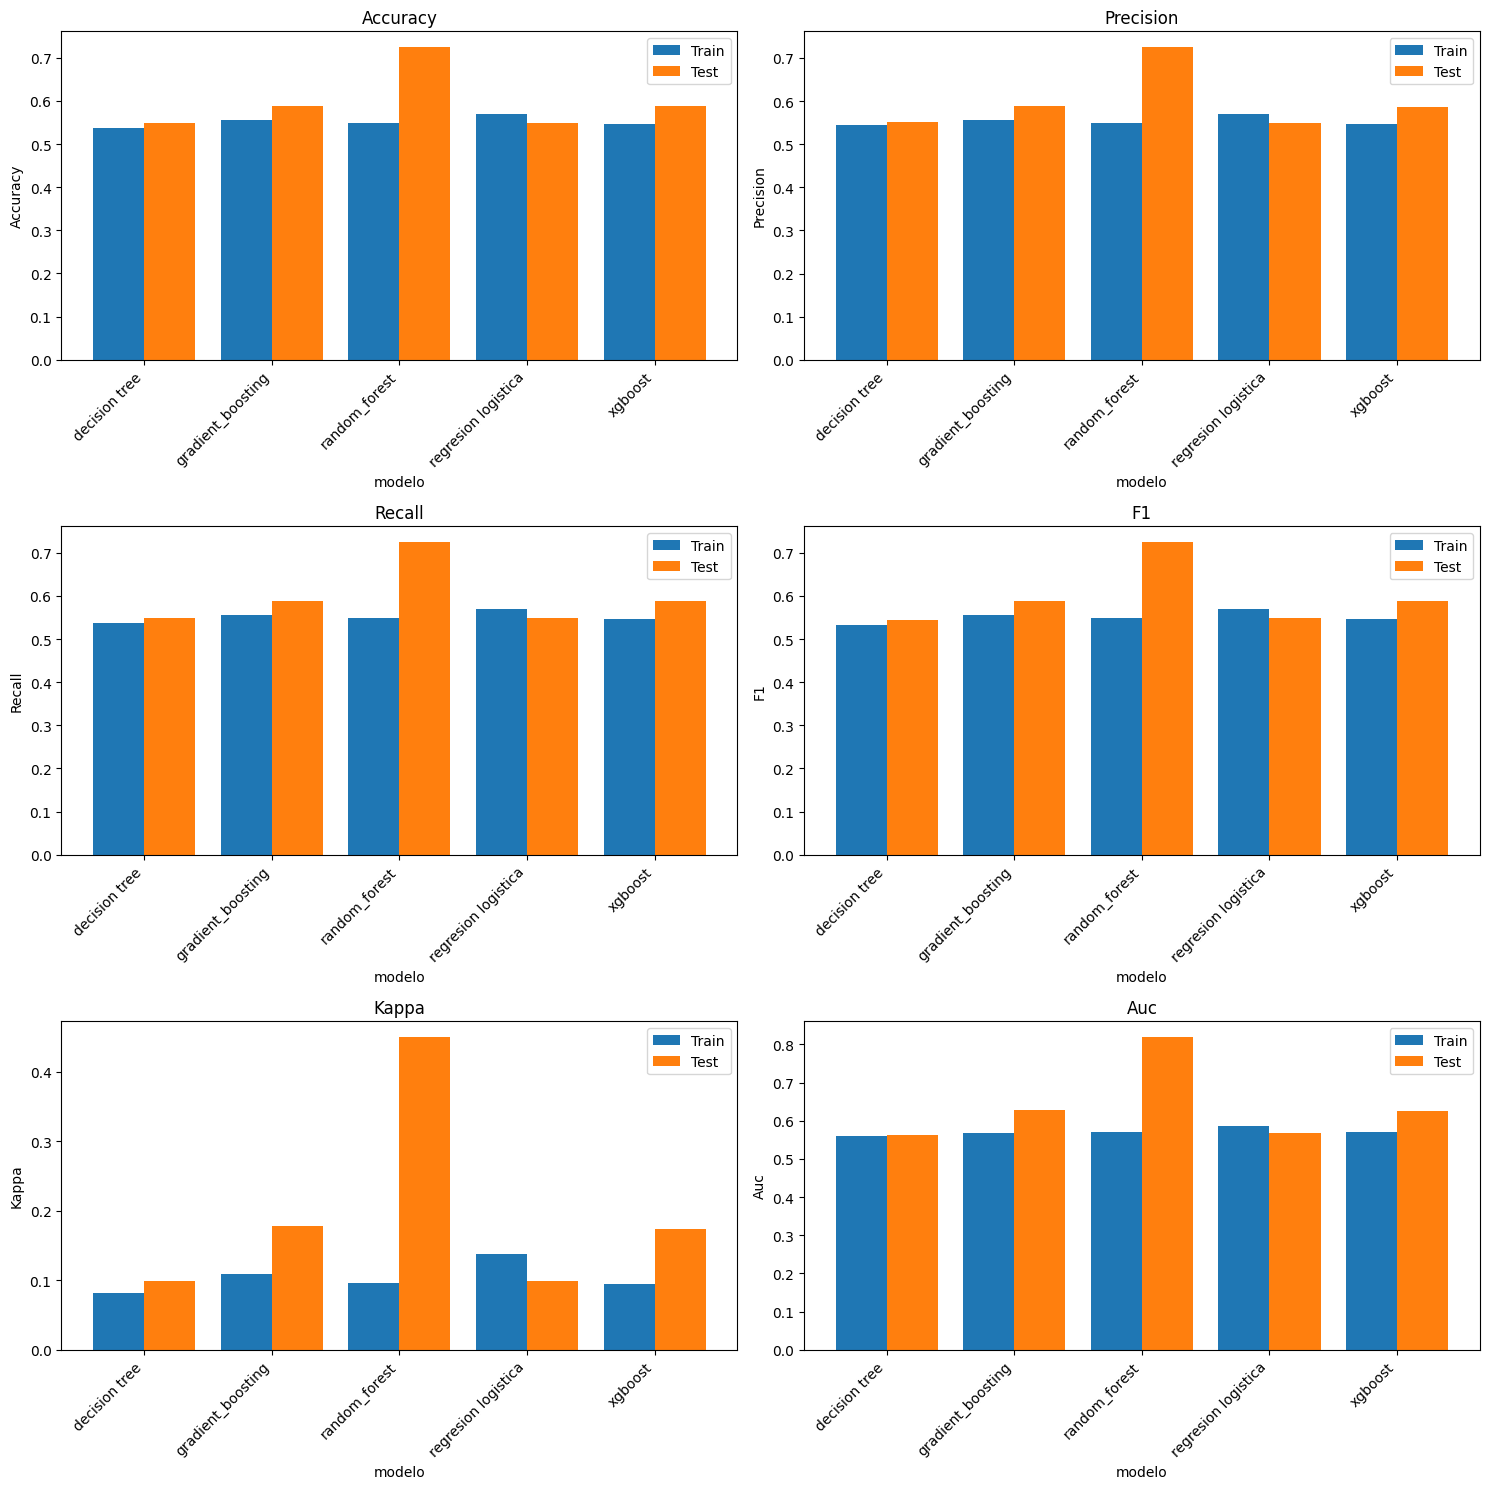

In [56]:


# Pivotar el DataFrame
df_pivot = df.pivot(index="modelo", columns="index", values=["accuracy", "precision", "recall", "f1", "kappa", "auc"])

# Crear los subgráficos utilizando `subplots`
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Crear una cuadrícula de subgráficos 3x2
metrics = ["accuracy", "precision", "recall", "f1", "kappa", "auc"]
colors = ["#1f77b4", "#ff7f0e"]  # Colores para train y test

# Generar los subgráficos
for i, (metric, ax) in enumerate(zip(metrics, axes.flatten())):
    df_pivot[metric].plot(kind="bar", color=colors, width=0.8, ax=ax)
    ax.set_title(metric.capitalize())
    ax.set_ylabel(metric.capitalize())
    ax.set_xticks(range(len(df_pivot.index)))  # Establecer los ticks en el eje X
    ax.set_xticklabels(df_pivot.index.tolist(), rotation=45, ha="right")  # Etiquetas del eje X rotadas
    ax.legend(["Train", "Test"], loc="best")

# Ajustar el diseño
plt.tight_layout()
plt.show()



## 1. Decision Tree

# Entrenamiento:

**Accuracy (54.86%)**: El modelo acierta en poco más de la mitad de los casos, lo que sugiere que no es muy efectivo.

**Precision (55.17%)**: De todas las predicciones positivas, solo el 55.17% son correctas. Indica que tiene un número moderado de falsos positivos.

**Recall (54.86%)**: Captura una proporción similar de los verdaderos positivos, lo que indica un rendimiento equilibrado entre estas métricas.

**F1 Score (54.40%)**: Bajo, lo que refleja que el modelo tiene problemas para manejar correctamente falsos positivos y negativos.


# Prueba:

Las métricas caen ligeramente respecto al entrenamiento, lo que sugiere que el modelo generaliza pobremente.

## 2. Regresión Logística

# Entrenamiento:

**Accuracy (54.98%):** Similar al árbol de decisión, apenas mejora respecto a un modelo aleatorio.

**Precision (54.97%):** Las predicciones positivas tienen un leve balance, aunque aún hay falsos positivos.

**Recall (54.98%):** Similar a la precisión, lo que indica equilibrio.

**F1 Score (54.95%):** Similar a las otras métricas, lo que sugiere que el modelo no tiene problemas de desbalance.


# Prueba:

**Accuracy (56.95%):** Mejora respecto al entrenamiento, indicando que el modelo generaliza mejor que el árbol de 
decisión.

**Precision (56.93%):** El modelo es más confiable en las predicciones positivas en prueba.


**F1 Score (56.93%):** Coherente con las demás métricas; el modelo tiene mejor equilibrio en el conjunto de prueba.


## 3. Random Forest

# Entrenamiento:

**Accuracy (72.51%):** Sobresale claramente en comparación con los modelos anteriores. Sin embargo, un valor alto puede ser síntoma de sobreajuste.

**Precision (72.53%):** Es muy precisa al identificar verdaderos positivos, indicando pocos falsos positivos.

**Recall (72.51%):** Captura la mayoría de los verdaderos positivos.

**F1 Score (72.50%):** El modelo tiene un excelente equilibrio en el entrenamiento.

# Prueba:

**Accuracy (54.85%):** Cae drásticamente, sugiriendo sobreajuste al conjunto de entrenamiento.

**Precision (54.83%):** Las predicciones positivas son confiables, pero el rendimiento general cae.

**F1 Score (54.84%):** El modelo pierde equilibrio en el conjunto de prueba.

## 4. Gradient Boosting

# Entrenamiento:

**Accuracy (58.94%):** Supera a los modelos simples como el árbol de decisión y la regresión logística.

**Precision (58.94%):** Tiene un buen manejo de falsos positivos.

**Recall (58.94%):** Captura los verdaderos positivos de manera equilibrada.

**F1 Score (58.91%):** Indica un modelo moderadamente equilibrado.

# Prueba:

**Accuracy (55.55%):** Cae un poco respecto al entrenamiento, pero mantiene estabilidad.

**Precision (55.52%):** Es confiable en predicciones positivas.

**F1 Score (55.52%):** Indica que el modelo logra un buen balance entre falsos positivos y negativos.


## 5. XGBoost

# Entrenamiento:

**Accuracy (58.72%):** Muy similar al Gradient Boosting.

**Precision (58.72%):** Fiable en predicciones positivas.

**Recall (58.72%):** Captura los verdaderos positivos con eficacia.

**F1 Score (58.72%):** Equilibrado entre precision y recall.

# Prueba:

**Accuracy (54.75%):** Similar al Random Forest, pero más estable.

**Precision (54.77%):** Buen manejo de falsos positivos.

**F1 Score (54.75%):** Consistente con otras métricas, aunque no sobresale.


## Comparación General:

Random Forest es muy efectivo en el entrenamiento, pero sufre sobreajuste severo. Sufre de overfiting.
Regresión Logística y Gradient Boosting tienen la mejor estabilidad entre entrenamiento y prueba, con desempeño decente, pero en este caso Gradient tambien tendria overfiting. por lo que de momento regresin logistiva seria la mejor metrica.
Decision Tree tiene el peor rendimiento general.
XGBoost es similar a Gradient Boosting, pero con un costo computacional menor.

## Next steps:

Para evitar falsos negativos, podemos ajustar Random Forest o Gradient Boosting para reducir el sobreajuste.

Para un modelo más estable con un rendimiento aceptable, podemos considerar Regresión Logística o Gradient Boosting.

Podemos evaluar el desbalanceado o si hay ruido en las etiquetas, lo que podría estar afectando estas métricas.